In [1]:
#import statements
import imageio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def convert_rgb_to_gray(image_path):
    '''
    Description: Converts an image from color to grayscale.
    params:
        image_path: path to image
        
    returns:
        type: imageio.core.util.Array
        grayscale image of the image at given path, returned as an numpy array
    '''
    pic = imageio.imread(image_path)
    gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
    gray_image_array = gray(pic)
    for row in range(len(gray_image_array)):
        for col in range(len(gray_image_array[0])):
            gray_image_array[row][col] = int(round(gray_image_array[row][col]))
    return gray_image_array


In [3]:
def convert_gray_image_to_list(array):
    '''
    The output of convert_rgb_to_gray method is an Array, this method converts it to list of lists
    params:
        array: Array to be converted
        
    returns:
        type: list[list]
        converted form
    '''
    return [list(elem) for elem in array]    

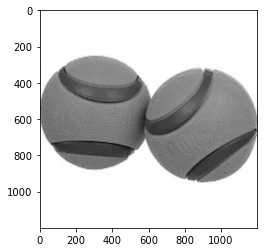

In [38]:
image_path = 'images/basket_balls.bmp'
gray_image = convert_rgb_to_gray(image_path)
gray_image = convert_gray_image_to_list(gray_image)
plt.imshow(gray_image, cmap = plt.get_cmap(name = 'gray'))

In [5]:
def list_to_histogram(image):
    '''
    This method forms an image histogram using the gray level values
    params: 
        image in list[list] format
    returns:
        type: list of 256 values[0-255] each indicating the number of pixels for each gray value
        histogram for the image given
    '''
    histogram = [0 for i in range(256)]
    for row in range(len(image)):
        for col in range(len(image[0])):
            histogram[int(image[row][col])] += 1
    return histogram

In [15]:
def mean_and_weight(histogram, low, high):
    '''
    Given a histogram, find the total weight of pixels between [low, high](inclusive) and mean of pixel values
    
    '''
    weighted_sum = 0
    total_number_of_pixels = 0
    for gray_level in range(low, high+1):
        total_number_of_pixels += histogram[gray_level]
        weighted_sum += (histogram[gray_level]*gray_level)
    if total_number_of_pixels == 0:
        return 0, 0
    # mean = weighed sum / total_number_of_pixels and weight = total_number_of_pixels(in this segment)/ total number of pixels
    return weighted_sum/total_number_of_pixels,(total_number_of_pixels/sum(histogram))

In [18]:
def variance(histogram, low, high, mean):
    total_number_of_pixels = sum(histogram[low:high+1])
    square_sum = 0
    for i in range(low, high+1):
        square_sum += histogram[i]*((i-mean)**2)
    if total_number_of_pixels == 0:
        return 0
    return square_sum/total_number_of_pixels


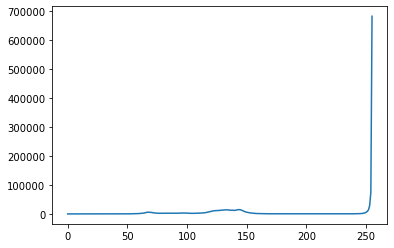

In [23]:
histogram = list_to_histogram(gray_image)
plt.plot(histogram)

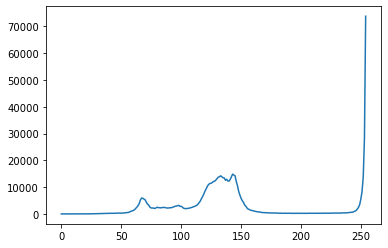

In [24]:
#The image before isn't legible, because of the higher number of lighter pixels(gray value 255), let's see the values till 254
plt.plot(histogram[:-1])

In [41]:

def find_min_error_threshold_two_segments(histogram):
    g = 256
    min_error = float("inf")
    min_error_threshold = -1
    for threshold in range(1, g):
        #Calculate background weight, variance
        background_mean, background_weight = mean_and_weight(histogram, 0, threshold)
        background_variance = variance(histogram,0, threshold, background_mean)
        #Calculate foreground weight, variance
        foreground_mean, foreground_weight = mean_and_weight(histogram, threshold+1, g-1)
        foreground_variance = variance(histogram, threshold+1, g-1, foreground_mean )
        #Compare with the smallest
        total_error = (foreground_variance*foreground_weight)+(background_variance*background_weight)
        if total_error < min_error:
            min_error = total_error
            min_error_threshold = threshold
    print(min_error, " is the min squared error for the image segments - 2")
    return min_error_threshold

def find_min_error_threshold_three_segments(histogram):
    g = 256
    min_error = float("inf")
    min_error_threshold = [-1, -1]
    for threshold1 in range(1, g):
        for threshold2 in range(threshold1+1, g):
            segment1_mean, segment1_weight = mean_and_weight(histogram, 0, threshold1)
            segment1_variance = variance(histogram, 0, threshold1, segment1_mean)
            
            segment2_mean, segment2_weight = mean_and_weight(histogram, threshold1+1, threshold2)
            segment2_variance = variance(histogram, threshold1, threshold2, segment2_mean)
            
            
            segment3_mean, segment3_weight = mean_and_weight(histogram, threshold2+1, g-1)
            segment3_variance = variance(histogram, threshold2+1, g-1, segment3_mean)
            
            total_error = (segment1_weight*segment1_variance)+(segment2_weight*segment2_variance)+(segment3_weight*segment3_variance)
            
            print(threshold1, threshold2, total_error)
            
            if total_error < min_error:
                min_error = total_error
                min_error_threshold = [threshold1, threshold2]
    print(min_error, " it the min squared error for the image segments - 3")
    return min_error_threshold

def find_min_error_threshold_four_segments(histogram):
    g = 256
    min_error = float("inf")
    min_error_threshold = [-1, -1, -1]
    for threshold1 in range(1, g):
        print(threshold1)
        for threshold2 in range(threshold1+1, g):
            for threshold3 in range(threshold2+1, g):
                segment1_mean, segment1_weight = mean_and_weight(histogram, 0, threshold1)
                segment1_variance = variance(histogram, 0, threshold1, segment1_mean)

                segment2_mean, segment2_weight = mean_and_weight(histogram, threshold1+1, threshold2)
                segment2_variance = variance(histogram, threshold1, threshold2, segment2_mean)


                segment3_mean, segment3_weight = mean_and_weight(histogram, threshold2+1, threshold3)
                segment3_variance = variance(histogram, threshold2+1, threshold3, segment3_mean)
                
                segment4_mean, segment4_weight = mean_and_weight(histogram, threshold3+1, g-1)
                segment4_variance = variance(histogram, threshold3+1, g-1, segment4_mean)

                total_error = (segment1_weight*segment1_variance)+(segment2_weight*segment2_variance)+(segment3_weight*segment3_variance)+(segment4_weight*segment4_variance)                
                if total_error < min_error:
                    min_error = total_error
                    min_error_threshold = [threshold1, threshold2, threshold3]
    print(min_error, " it the min squared error for the image segments - 3")
    return min_error_threshold

In [42]:
threshold = find_min_error_threshold_four_segments(histogram)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
56.55041421883534  it the min squared error for the image segments - 3


In [43]:
print(threshold)

[99, 133, 199]


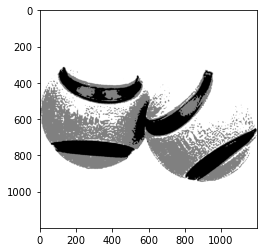

In [44]:
def divide_into_two_segments(gray_image, threshold):
    for i in range(len(gray_image)):
        for j in range(len(gray_image[0])):
            if gray_image[i][j] <= threshold:
                gray_image[i][j] = 0
            else:
                gray_image[i][j] = 255
    return gray_image

def divide_into_three_segments(gray_image, threshold):
    for i in range(len(gray_image)):
        for j in range(len(gray_image[0])):
            if gray_image[i][j] <= threshold[0]:
                gray_image[i][j] = 0
            elif gray_image[i][j] <= threshold[1]:
                gray_image[i][j] = 128
            else:
                gray_image[i][j] = 255
    return gray_image


In [ ]:
#Quick observation:
'''
in class variance is not the correct way to see how many number of segments
Because in class variance gets lower each time the number of segments gets increased
'''